<a href="https://colab.research.google.com/github/Mhamuda/CSE4211-Artificial_Intelligence_Lab/blob/main/Polynomial_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense

#a) Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.

In [ ]:
inputs = Input((1,))
x = Dense(32,activation='relu')(inputs)
x = Dense(64,activation='relu')(x)
x = Dense(128,activation='relu')(x)
outputs = Dense(1, name='OutputLayer',activation='linear')(x)
model = Model(inputs, outputs, name='DNN')
model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

#b) Generate training samples within the range of -20 to +20. Use the appropriate method for normalizing the training data in the range of -1 to +1.

In [ ]:
x = np.arange(-20,20,0.1)
y = 7*pow(x,3) - 12*pow(x,2) - 22*x +7

print(x[:10])
print(y[:10])

[-20.  -19.9 -19.8 -19.7 -19.6 -19.5 -19.4 -19.3 -19.2 -19.1]
[-60353.    -59471.513 -58598.624 -57734.291 -56878.472 -56031.125
 -55192.208 -54361.679 -53539.496 -52725.617]


In [ ]:
total_cnt = x.shape[0]
total_cnt

ind = np.random.permutation(total_cnt)
x = x[ind]
y = y[ind]

print(x)

[ 1.99000000e+01  6.10000000e+00 -1.08000000e+01  1.00000000e+00
  1.80000000e+01 -3.00000000e+00  1.91000000e+01  1.36000000e+01
  1.93000000e+01 -9.40000000e+00  6.50000000e+00 -5.20000000e+00
 -1.75000000e+01 -9.30000000e+00 -1.50000000e+00  3.10000000e+00
  1.10000000e+00 -7.80000000e+00 -5.40000000e+00  1.26000000e+01
  1.94000000e+01 -1.95000000e+01 -1.68000000e+01  8.90000000e+00
  1.64000000e+01 -6.90000000e+00  1.20000000e+00  1.51000000e+01
 -3.90000000e+00 -1.57000000e+01 -1.04000000e+01 -6.10000000e+00
  1.24000000e+01 -1.60000000e+01 -1.50000000e+01  5.90000000e+00
 -1.84000000e+01 -1.30000000e+00 -1.00000000e+01 -8.10000000e+00
 -1.59000000e+01  1.32000000e+01 -4.00000000e-01 -5.00000000e-01
 -5.90000000e+00 -6.20000000e+00  7.90000000e+00 -9.80000000e+00
  1.87000000e+01 -1.90000000e+01  1.66000000e+01  8.10000000e+00
  8.20000000e+00 -1.28000000e+01  6.20000000e+00 -2.90000000e+00
  1.70000000e+01  6.00000000e-01 -1.35000000e+01 -1.40000000e+01
 -7.70000000e+00 -2.00000

#Normalization

In [ ]:
x_normalized = 2*(x-np.min(x))/(np.max(x)-np.min(x))-1
y_normalized = 2*(y-np.min(y))/(np.max(y)-np.min(y))-1

print("Normalized x values: ", x_normalized[:10])
print("Normalized y values: ", y_normalized[:10])

Normalized x values:  [ 1.          0.30827068 -0.53884712  0.05263158  0.9047619  -0.14786967
  0.95989975  0.68421053  0.96992481 -0.46867168]
Normalized y values:  [ 1.          0.11240407 -0.08677631  0.09364023  0.75648051  0.08994238
  0.89129224  0.3676525   0.91760758 -0.0267323 ]


#c) Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with and appropriate number of epochs.

In [ ]:
size = len(x_normalized)
x_train = x_normalized[:int(size*0.9)]
y_train = y_normalized[:int(size*0.9)]
x_test = x_normalized[int(size*.95):]
y_test = y_normalized[int(size*.95):]
x_validation = x_normalized[int(size*0.9): int(size*.95)]
y_validation = y_normalized[int(size*0.9): int(size*.95)]

print("Train data shape", x_train.shape, y_train.shape)
print("Test data shape", x_train.shape, y_train.shape)
print("validation data shape", x_validation.shape, y_validation.shape)

Train data shape (360,) (360,)
Test data shape (360,) (360,)
validation data shape (20,) (20,)


#Plotting the dataset

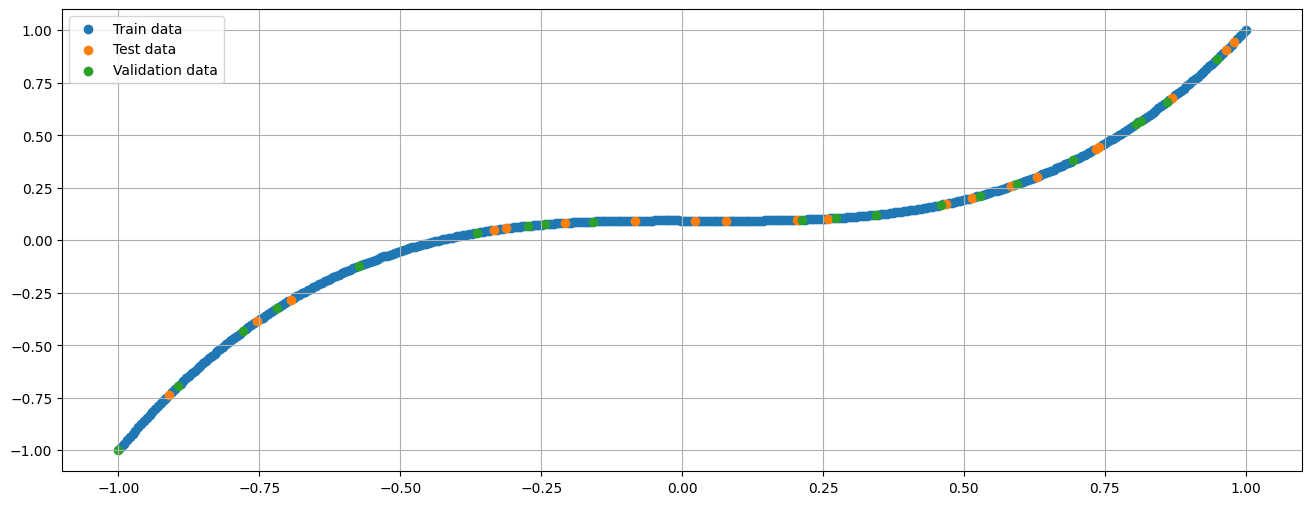

In [ ]:
plt.figure(figsize=(16,6))

plt.scatter(x_train,y_train, label='Train data')
plt.scatter(x_test,y_test, label='Test data')
plt.scatter(x_validation,y_validation, label='Validation data')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=[tf.keras.metrics.R2Score(name='accuracy')])
history = model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_validation,y_validation))

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0983 - loss: 0.1165 - val_accuracy: 0.6658 - val_loss: 0.0636
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7312 - loss: 0.0402 - val_accuracy: 0.8290 - val_loss: 0.0325
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8001 - loss: 0.0254 - val_accuracy: 0.8725 - val_loss: 0.0243
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8724 - loss: 0.0175 - val_accuracy: 0.9085 - val_loss: 0.0174
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9132 - loss: 0.0121 - val_accuracy: 0.9385 - val_loss: 0.0117
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9337 - loss: 0.0087 - val_accuracy: 0.9523 - val_loss: 0.0091
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9557 - loss: 0.0058 - val_accuracy: 0.9672 - val_loss: 0.0062
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9667 - loss: 0.0052 - val_accuracy: 0.9772 - val_loss

#d) Display the training accuracy vs validation accuracy and training error vs validation error curves.

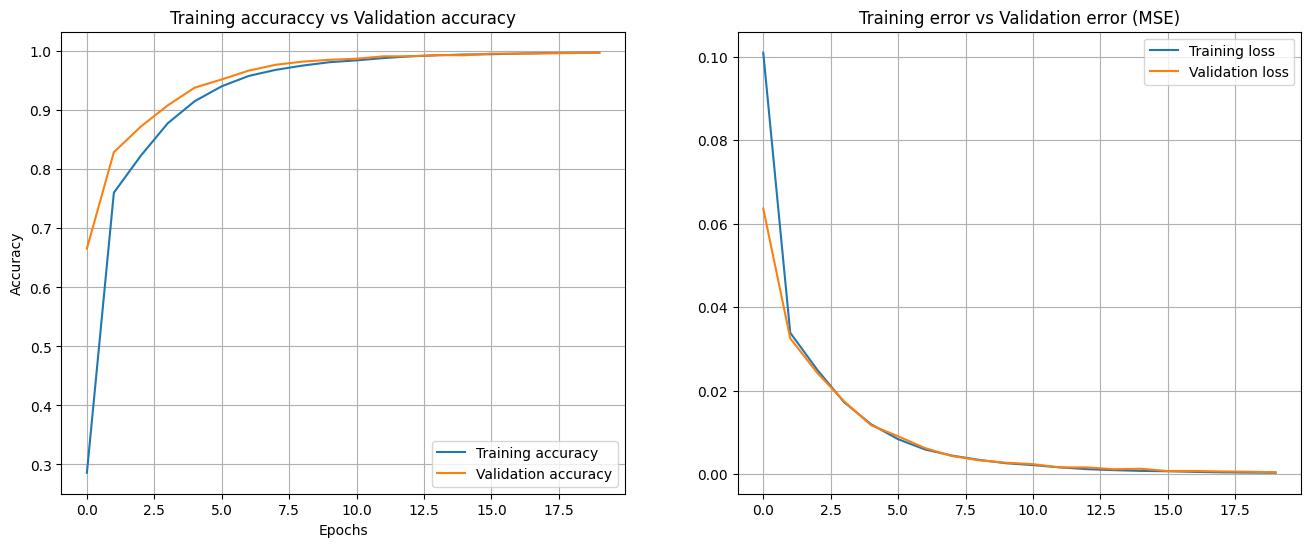

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training accuraccy vs Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training error vs Validation error (MSE)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
test_loss, test_accu = model.evaluate(x_test, y_test)

print(f'Test loss: {test_loss: 0.7f}')
print(f'Test accuracy: {test_accu*100: 0.5f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9975 - loss: 3.6942e-04
Test loss:  0.0003694
Test accuracy:  99.75094%


#e) After training, use the test data for prediction and display the prediction accuracy vs true levels of the test data.

#Data prediction on test data

In [ ]:
y_predict = model.predict(x_test)
print(y_predict[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[ 0.3063041 ]
 [ 0.05665468]
 [ 0.86046106]
 [ 0.09873514]
 [ 0.47270185]
 [ 0.25978363]
 [ 0.1763324 ]
 [ 0.08110458]
 [-0.28023237]
 [ 0.46408498]]


#Denormalized data

In [ ]:
x_true = (((x_test+1)*(np.max(x)-np.min(x)))/2)+np.min(x)
y_true = (((y_test+1)*(np.max(y)-np.min(y)))/2)+np.min(y)
y_predict_true = (((y_predict+1)*(np.max(y)-np.min(y)))/2) +np.min(y)

print(x_true)
print(y_true)
print(y_predict_true)

[ 12.5  -6.3  19.2  -1.7  14.7  11.6   9.3  -4.2 -13.9  14.6  19.5 -15.1
   5.1  10.2   4.    0.4   1.5  17.3 -18.2  -6.7]
[ 1.1528875e+04 -2.0810090e+03  4.4706136e+04 -2.4671000e+01
  1.9326181e+04  9.0633520e+03  4.3950190e+03 -6.3089600e+02
 -2.0805053e+04  1.8912832e+04  4.6919125e+04 -2.6497577e+04
  5.1123700e+02  5.9625760e+03  1.7500000e+02 -3.2720000e+00
 -2.9375000e+01  3.2278939e+04 -4.5767456e+04 -2.4896210e+03]
[[ 1.1712055e+04]
 [-2.0603867e+03]
 [ 4.2283305e+04]
 [ 2.6107031e+02]
 [ 2.0891742e+04]
 [ 9.1456562e+03]
 [ 4.5418867e+03]
 [-7.1155859e+02]
 [-2.0645480e+04]
 [ 2.0416375e+04]
 [ 4.3709406e+04]
 [-2.7150848e+04]
 [ 6.6891406e+02]
 [ 6.0859453e+03]
 [ 1.7760156e+02]
 [ 1.8628906e+01]
 [-9.1074219e+01]
 [ 3.3251320e+04]
 [-4.5672141e+04]
 [-2.5128984e+03]]


#Plotting the prediction accuracy vs true levels of the test data

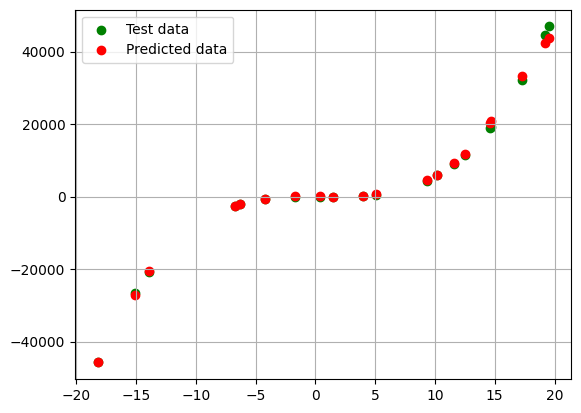

In [ ]:
plt.scatter(x_true,y_true,color='green',marker='o',label='Test data')
plt.scatter(x_true,y_predict_true,color='red',marker='o',label='Predicted data')
plt.legend()
plt.grid()
plt.show()